# TEMPLATE 2 - MODEL

# Libraries

In [1]:
import pandas as pd     # Manejo de dataframes
import numpy as np      # Calculos matriciales
import matplotlib.pyplot as plt    # Visualizacion
import seaborn as sns              # Visualizacion
from google.colab import drive     # Drive en Colab



import warnings
warnings.filterwarnings("ignore")  # inhabilita warnings

from pickle import dump    # guardar archivos comprimidos

# Load clean data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df3 = pd.read_csv('/content/drive/MyDrive/FINAL/df3_prepo.csv',index_col=0)

In [ ]:
df3.head()

,rev,mou,totmrc,da,ovrmou,datovr,roam,change_mou,change_rev,unan_vce,...,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,region_midwest,region_north,region_south,region_west,tiene_hijos_menores_U
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,-157.25,-18.9975,6.333333,...,0,0,0,0,0,0,0,0,1,1
1,57.4925,482.75,37.425,0.2475,22.75,0.0,0.0,532.25,50.9875,61.333333,...,0,0,0,1,0,1,0,0,0,1
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,-4.25,0.0000,2.666667,...,0,0,0,0,0,1,0,0,0,0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,-1.50,0.0000,0.000000,...,0,0,1,0,0,1,0,0,0,0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,38.50,0.0000,77.000000,...,0,0,0,0,0,0,1,0,0,1


# Split X-y

In [4]:
target = 'churn'

# Target distribution

[]

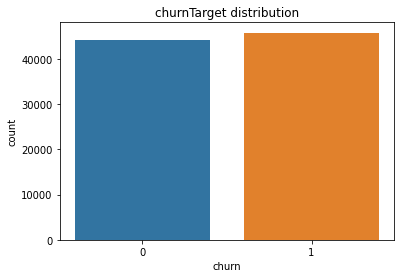

In [7]:
sns.countplot(x=target,data=df3)
plt.title(target +"Target distribution")
plt.plot()

Observamos que el target no esta desbalanceado, no es necesario realizar undersampling

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

# Split TRAIN-TEST data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
target = 'churn'
features = df3.columns[df3.columns != target]

In [10]:
y = df3[target]
X = df3[features]

In [ ]:
y.describe()

count    90000.000000
mean         0.508889
std          0.499924
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn, dtype: float64

Divide X-y en Train (80%) y Test (20%)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

In [12]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 72000
Test set size: 18000


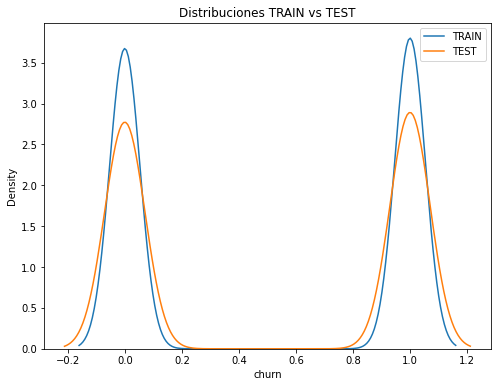

In [13]:
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

 Rescaling

* NO NECESARIO en modelos de arboles de decisión.
* .fit en datos de TRAIN.

El escalado de características no es necesario en los modelos de árbol de decisión, ya que estos modelos dividen el espacio de características en regiones y no se ven afectados por los cambios de escala en las características individuales. En otras palabras, los modelos de árbol de decisión son invariantes a la escala de las características.

Sin embargo, en nuetsro caso el escalado de características puede ser útilya que estamos estudiando el modelo de regresión logística 

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [17]:
X_train_std

array([[ 0.01236293,  2.38068606,  1.67560598, ..., -0.87499409,
        -0.43128313,  0.55471783],
       [-0.60082086, -0.85575493, -0.68139897, ..., -0.87499409,
        -0.43128313,  0.55471783],
       [-0.37423037,  0.42806241, -0.03857944, ..., -0.87499409,
        -0.43128313,  0.55471783],
       ...,
       [ 0.13960632,  1.04210415, -0.03857944, ...,  1.14286486,
        -0.43128313,  0.55471783],
       [-0.37396317, -0.54267603, -0.68097043, ..., -0.87499409,
        -0.43128313,  0.55471783],
       [-0.09703111, -0.48888074, -0.89567215, ..., -0.87499409,
         2.31866245, -1.80271834]])

In [18]:
X_train_std = pd.DataFrame(data = X_train_std, columns=X_train.columns, index=X_train.index)    
X_test_std = pd.DataFrame(data = X_test_std, columns=X_test.columns, index=X_test.index)  

In [19]:
X_train

,rev,mou,totmrc,da,ovrmou,datovr,roam,change_mou,change_rev,unan_vce,...,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,region_midwest,region_north,region_south,region_west,tiene_hijos_menores_U
69027,58.9225,1731.00,84.99,0.7425,22.75,0.0000,0.000,215.00,-58.9225,0.000000,...,0,0,0,0,1,1,0,0,0,1
10948,30.2375,61.50,29.99,0.2475,0.00,0.0000,0.000,-8.50,0.7425,4.666667,...,0,1,0,0,0,0,1,0,0,1
15402,40.8375,723.75,44.99,0.2475,14.00,0.0000,0.000,222.25,16.5525,21.333333,...,0,1,0,0,0,0,1,0,0,1
42463,154.1975,852.50,159.99,4.2075,0.00,0.0000,0.000,553.50,-1.2375,0.000000,...,0,0,0,0,0,0,0,1,0,1
26325,40.6900,156.75,42.49,0.0000,0.00,0.0000,0.320,113.25,0.9600,19.000000,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54578,38.5475,166.25,54.99,0.7425,0.00,0.0000,0.000,67.75,-2.5675,13.000000,...,0,1,0,0,1,1,0,0,0,1
56760,17.1400,297.50,10.00,0.0000,0.00,0.0000,7.015,23.50,-7.1400,8.000000,...,0,0,0,0,0,1,0,0,0,0
80037,64.8750,1040.50,44.99,0.2475,73.25,0.0000,0.000,-361.50,-3.8350,54.000000,...,0,0,1,0,1,0,0,1,0,1
30727,40.8500,223.00,30.00,0.4950,29.00,0.0975,0.195,227.00,30.3900,11.666667,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
X_train_std.head(3)

,rev,mou,totmrc,da,ovrmou,datovr,roam,change_mou,change_rev,unan_vce,...,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,creditcd_N,region_midwest,region_north,region_south,region_west,tiene_hijos_menores_U
69027,0.012363,2.380686,1.675606,-0.064223,-0.184892,-0.077145,-0.079588,0.825939,-1.090178,-0.717950,...,-0.10246,-0.385487,-0.352882,-0.215277,1.535799,1.921161,-0.494308,-0.874994,-0.431283,0.554718
10948,-0.600821,-0.855755,-0.681399,-0.297160,-0.415922,-0.077145,-0.079588,0.017589,0.034185,-0.593049,...,-0.10246,2.594122,-0.352882,-0.215277,-0.651127,-0.520519,2.023032,-0.874994,-0.431283,0.554718
15402,-0.374230,0.428062,-0.038579,-0.297160,-0.273750,-0.077145,-0.079588,0.852161,0.332118,-0.146974,...,-0.10246,2.594122,-0.352882,-0.215277,-0.651127,-0.520519,2.023032,-0.874994,-0.431283,0.554718


# TRAIN-VALIDATION

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [21]:
# Calculo del AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculo del AUC de un modelo sobre un dataset con Cross-Validation (X-y). Args: modelo a validar, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv=4,                 # Numero de folds que vamos a utilizar para validar 
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )    
  return cross_val.mean()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=0)

# Entrenar el clasificador con los datos
clf.fit(X_train, y_train)

# Obtener la importancia de las variables
importances = clf.feature_importances_

# Ordenar las importancias de mayor a menor
indices = np.argsort(importances)[::-1]

# Imprimir el ranking de importancia de las variables
print("Ranking de importancia de variables:")
for f in range(X_train.shape[1]):
    print("%d. Variable %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Ranking de importancia de variables:
1. Variable 51 (0.055877)
2. Variable 7 (0.041219)
3. Variable 1 (0.036543)
4. Variable 8 (0.035942)
5. Variable 0 (0.031966)
6. Variable 37 (0.029537)
7. Variable 32 (0.029385)
8. Variable 38 (0.029027)
9. Variable 36 (0.027797)
10. Variable 39 (0.026638)
11. Variable 29 (0.026385)
12. Variable 35 (0.026270)
13. Variable 9 (0.025536)
14. Variable 18 (0.024176)
15. Variable 40 (0.022495)
16. Variable 2 (0.022147)
17. Variable 25 (0.022132)
18. Variable 24 (0.022061)
19. Variable 22 (0.022036)
20. Variable 20 (0.021699)
21. Variable 28 (0.020882)
22. Variable 27 (0.020814)
23. Variable 21 (0.020195)
24. Variable 13 (0.020079)
25. Variable 4 (0.018969)
26. Variable 11 (0.018542)
27. Variable 46 (0.016397)
28. Variable 41 (0.014825)
29. Variable 6 (0.014475)
30. Variable 23 (0.014446)
31. Variable 16 (0.012944)
32. Variable 3 (0.012539)
33. Variable 48 (0.010813)
34. Variable 47 (0.010538)
35. Variable 31 (0.010215)
36. Variable 15 (0.009373)
37. Varia

In [22]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs: 
#   * modelo
#   * (X,y) 
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

## Model Competition

Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [23]:
from sklearn.linear_model import LogisticRegression

evaluate_classification(model = LogisticRegression(), 
                        X = X_train_std, 
                        y = y_train)

,Model,AUC Train,AUC Cross-Valida
0,LogisticRegression(),0.626643,0.622135


In [24]:
from sklearn.ensemble import AdaBoostClassifier

evaluate_classification(model = AdaBoostClassifier(), X = X_train, y = y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135


In [25]:
from sklearn.ensemble import BaggingClassifier

evaluate_classification(model = BaggingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135
2,BaggingClassifier(),0.998928,0.615698


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

evaluate_classification(model = GradientBoostingClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,GradientBoostingClassifier(),0.687301,0.670275
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135
2,BaggingClassifier(),0.998928,0.615698


In [27]:
from sklearn.ensemble import RandomForestClassifier

evaluate_classification(model = RandomForestClassifier(), X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,GradientBoostingClassifier(),0.687301,0.670275
4,RandomForestClassifier(),1.000000,0.658743
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135
2,BaggingClassifier(),0.998928,0.615698


In [28]:
from sklearn.ensemble import HistGradientBoostingClassifier

evaluate_classification(model = HistGradientBoostingClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
5,HistGradientBoostingClassifier(),0.745495,0.677811
3,GradientBoostingClassifier(),0.687301,0.670275
4,RandomForestClassifier(),1.000000,0.658743
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135
2,BaggingClassifier(),0.998928,0.615698


In [29]:
from xgboost import XGBClassifier

evaluate_classification(model = XGBClassifier(), 
                        X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
5,HistGradientBoostingClassifier(),0.745495,0.677811
3,GradientBoostingClassifier(),0.687301,0.670275
6,"XGBClassifier(base_score=None, booster=None, c...",0.843611,0.667415
4,RandomForestClassifier(),1.000000,0.658743
1,AdaBoostClassifier(),0.663378,0.656281
0,LogisticRegression(),0.626643,0.622135
2,BaggingClassifier(),0.998928,0.615698


## Hyperparameter tuning

Probamos diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de conseguir el mejor performance del modelo en los datos de VALIDACION.

In [30]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
parameters_hpHGB = {
    'learning_rate': [0.01, 0.1, 1],
    'max_iter': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'l2_regularization': [0.0, 0.1, 0.5],
    'min_samples_leaf': [1, 5, 10]
}

In [32]:
search_hp = RandomizedSearchCV(estimator = HistGradientBoostingClassifier(), 
                               param_distributions = parameters_hpHGB,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 20,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1, 
                               verbose=True)

In [33]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


RandomizedSearchCV(cv=4, estimator=HistGradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0.0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 1],
                                        'max_depth': [3, 5, 7],
                                        'max_iter': [100, 200, 300],
                                        'min_samples_leaf': [1, 5, 10]},
                   scoring='roc_auc', verbose=True)

Corroboramos que realizando la hiperparametrizacion en HistGradientBoostingClassifier no mejora el modelo.

In [34]:
print("---- Results from Random Search -----")
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: HistGradientBoostingClassifier(max_depth=3, max_iter=300, min_samples_leaf=10)

 The best AUC: 0.6790013341521376

 The best parameters across ALL searched params:
 {'min_samples_leaf': 10, 'max_iter': 300, 'max_depth': 3, 'learning_rate': 0.1, 'l2_regularization': 0.0}


In [41]:
best_model = search_hp.best_estimator_

In [36]:
print('AUC Train:', auc(best_model, X_train, y_train))

AUC Train: 0.714293255920211


In [37]:
print('AUC CV:', auc_cross_validation(best_model, X_train, y_train))

AUC CV: 0.6788157831652244


Vamos a probar la hiperparametrizacion con el modelo GradientBoostingClassifier()	

In [38]:
parameters_hpGBC =  {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}


In [39]:
search_hpGBC = RandomizedSearchCV(estimator = GradientBoostingClassifier(), 
                               param_distributions = parameters_hpGBC,
                               scoring = 'roc_auc',                         # metrica a optimizar: AUC
                               cv = 4,                                      # numero de folds para cross-validation
                               n_iter = 20,                                 # numero de iteraciones, cada una testeara una configuracion distinta
                               n_jobs=-1, 
                               verbose=True)

In [ ]:
search_hpGBC.fit(X_train, y_train)

## Select best model

Explicar por que nos quedamos con este, y con los parametros por default porque nos demora mucho la hiperparametrizacion 

In [42]:
best_model 

HistGradientBoostingClassifier(max_depth=3, max_iter=300, min_samples_leaf=10)

In [43]:
#Save model
dump(best_model, open('/content/drive/MyDrive/FINAL/model.pkl', 'wb'))

# TEST

* Evaluación de las métricas de performance en TEST.
  * Clasificación: AUC, ROC curve, F1-score, Accuracy, Precision, Recall.
  * Regresión: RMSE, R2-score, MAE, MAPE%, distribucion del error.

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
y_train_pred = best_model.predict(X_train)              # predicciones del modelo en los datos de TRAIN
y_test_pred = best_model.predict(X_test)                # predicciones del modelo en los datos de TEST

In [51]:
y_train_pred_proba = best_model.predict_proba(X_train)[:, 1]      
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]  

In [52]:
from sklearn.metrics import roc_auc_score
auc_train = roc_auc_score(y_train, y_train_pred_proba)      
auc_test = roc_auc_score(y_test, y_test_pred_proba) 

In [53]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.7143
AUC Test: 0.6789


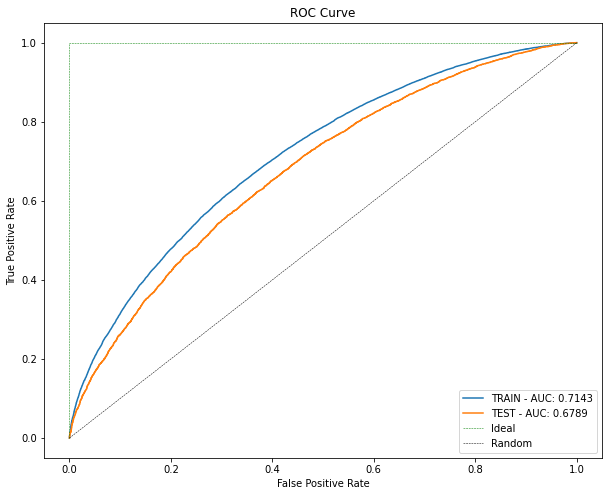

In [54]:
from sklearn.metrics import roc_curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.6263
Precision: 0.6289
Recall: 0.6537
F1-score: 0.6411


# Interpretability / Explainability

* En modelos lineales: top features por peso de los coeficentes y formula del modelo.
* En modelos de arboles: Feature Importance y/o SHAP values y plot arbol de decision.

In [61]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
import pickle

# Guardar la variable en un archivo con pickle
with open('/content/drive/MyDrive/FINAL/best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

In [71]:
import pickle

# Guardar la variable en un archivo con pickle
with open('/content/drive/MyDrive/FINAL/search_hp.pkl', 'wb') as f:
    pickle.dump(search_hp, f)